In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Salary.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [4]:
df.tail(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
387,Prof,A,29,15,Male,109305
388,Prof,A,38,36,Male,119450
389,Prof,A,33,18,Male,186023
390,Prof,A,40,19,Male,166605
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [5]:
df.sample(5)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
352,Prof,B,26,27,Male,142500
66,Prof,B,22,12,Male,101000
233,Prof,A,36,19,Female,117555
329,Prof,B,23,23,Male,134778
40,Prof,B,23,2,Male,146500


In [6]:
df.shape

(397, 6)

In [7]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [9]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [10]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

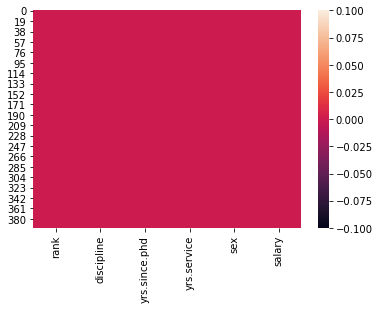

In [11]:
sns.heatmap(df.isnull())

there is no null value in our dataset

In [12]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# About columns:

1.Rank: 
    
    it shows designation or job title of the position
    
2.descipline:
    
    it is the branch or practice of training 
    
3.yrs.since.phd:
    
    years completed after phd 

4.yrs.service:
    
    experience in the same field or work experience

5.sex:
    
    Gender of the person
    
6.salary:
    
    income 

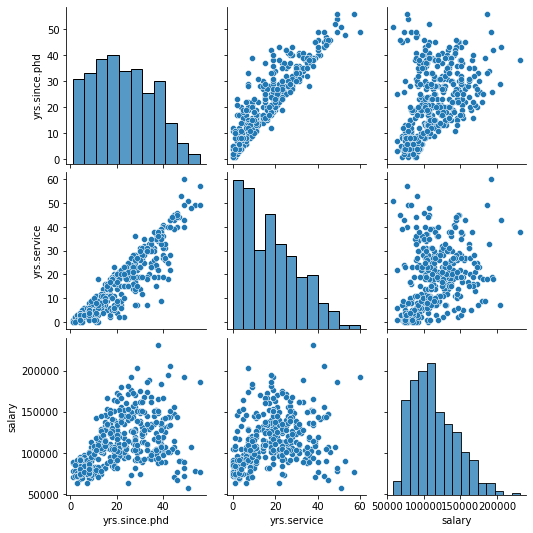

In [13]:
sns.pairplot(df)

In [14]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# Scatterplot:

<AxesSubplot:xlabel='sex', ylabel='count'>

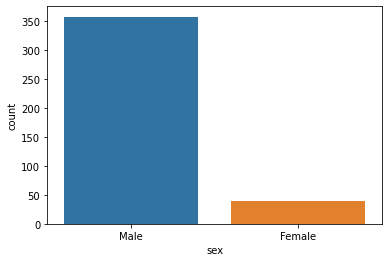

In [15]:
sns.countplot(x='sex',data=df)

# scatterplot:

<AxesSubplot:xlabel='rank', ylabel='salary'>

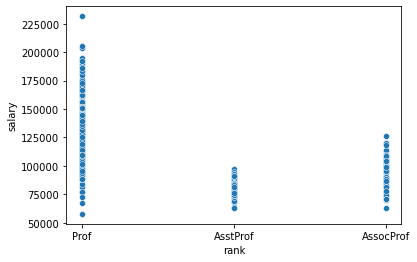

In [16]:
sns.scatterplot(x='rank',y='salary',data=df)

we can see that, prof rank has more salary than asstprof rank and assocprof rank

<AxesSubplot:xlabel='discipline', ylabel='salary'>

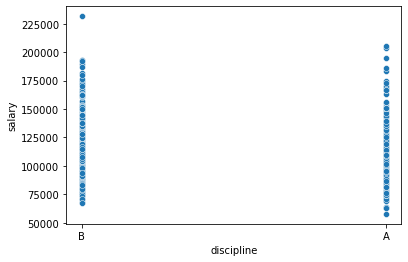

In [17]:
sns.scatterplot(x='discipline',y='salary',data=df)

We can see that salary is equally disrtibuted between A and B discipline 

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

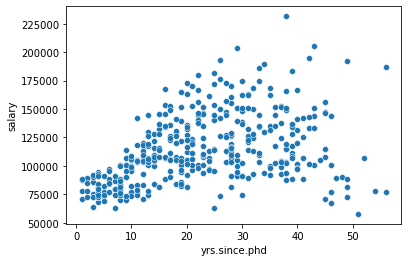

In [18]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

we can see that as years of experience grows, salary also increasing but at last there is less salary after 45 yrs

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

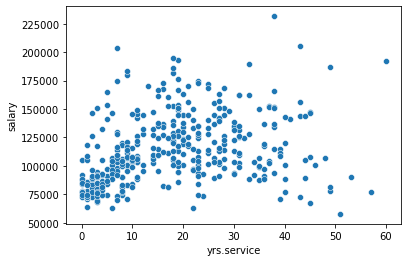

In [19]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

 from 0 to 40 years there is more salary but after 40 years the salary is low

<AxesSubplot:xlabel='sex', ylabel='salary'>

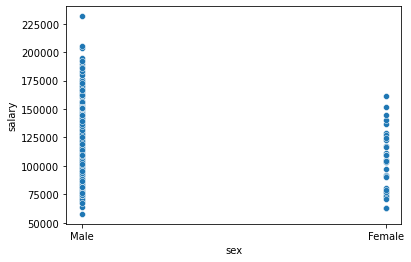

In [20]:
sns.scatterplot(x='sex',y='salary',data=df)

we can see that Male are getting more salary than female

# we will drop the rank,discipline and sex column as it will have no impact on our data

In [21]:
df.drop(['rank'],axis=1,inplace=True)
df.drop(['discipline'],axis=1,inplace=True)
df.drop(['sex'],axis=1,inplace=True)


In [22]:
df

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


# Correlation:

In [23]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [24]:
type(df.corr())

pandas.core.frame.DataFrame

In [25]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

In [26]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

# Correlation using heatmap:

<AxesSubplot:>

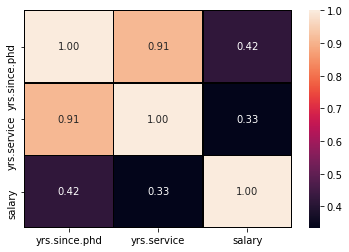

In [27]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='Black',fmt='.2f')

# Outcomes from Correlation:

all the columns of the dataset are positively correlated with the target column 

1.decipline has 16 percent correlation with target column which can be considered as a weak bond

2.sex has 14 percent correlation with the target column which is weak bond

3.yrs.since.service has 33 percent correlation to the target column wich is good bond

4.yrs.since.phd has 42 percent correlation with target column which can be considered as a strong bond

5.salary is our target column

Max correlation: yrs.since.phd

min correlation: descipline

# Describing dataset:

In [28]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


we can see that in yrs of service and yrs.since.phd column, the difference between 1st,2nd and 3rd quartile is not equal

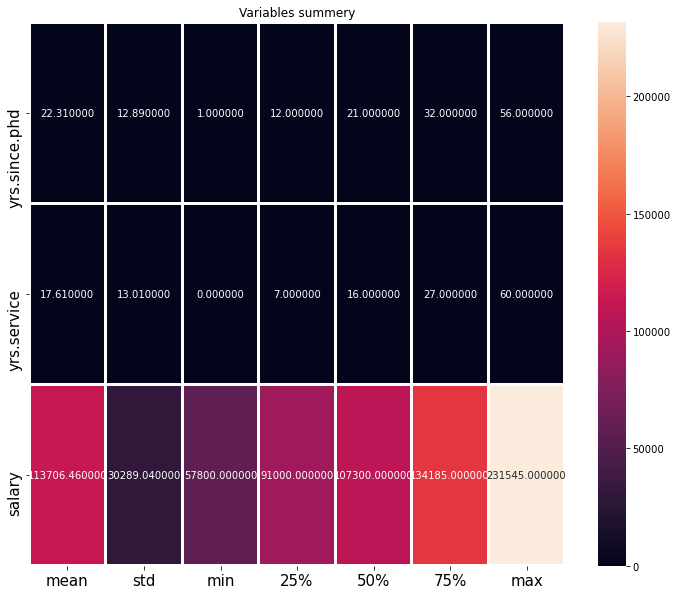

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Variables summery')
plt.show()

# Outcomes from describe dataset:

from above plot we are describing mean,std daviation, min and max of dataset which will help us in cleaning dataset further 

total number of rows in datasets:
    
    1. 397 rows
    
    2. 5 columns
    
Descipline:
    
    1.Mean=0.54
   
    2.std.d=0.50
    
    3.max_value=1.000
    
    4.min_value=0

yrs.since.phd:
    
    1.Mean=22.31000
    
    2.std.d=12.89000
    
    3.max_value=56.000
    
    4.min_value=1.000
    
yrs.since.service:
    
    1.Mean=17.61000
    
    2.std.d=13.010000
    
    3.max_value=60.0000
    
    4.min_value=13.0000
    
sex:
    
    1.Mean=0.90000
    
    2.std.d=0.300000
    
    3.max_value=1.000
    
    4.min_value=0
    
salary:
    
    1.Mean=113706.4600
    
    2.std.d=30289.04000
    
    3.max_value=231545.000
    
    4.min_value=57800.00000

salary:
   this is our target data


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   yrs.since.phd  397 non-null    int64
 1   yrs.service    397 non-null    int64
 2   salary         397 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB


from above got we can get data types and memory used by dataframe

# Outliers Checking:

In [31]:
import warnings
warnings.filterwarnings('ignore')

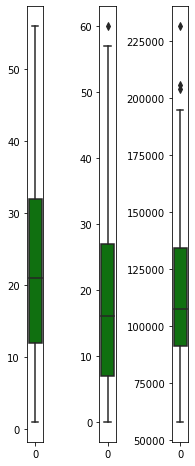

In [32]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,ncol*3))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

we can see thatb there are only few outliers available

# Skewness:

In [33]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

we can see that there is skewness present in our data

# Normal Distribution Curve:

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

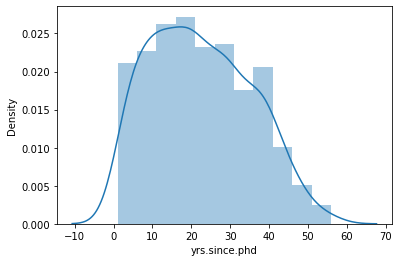

In [34]:
sns.distplot(df['yrs.since.phd'])

There are some outliers available and it is not normally distributed

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

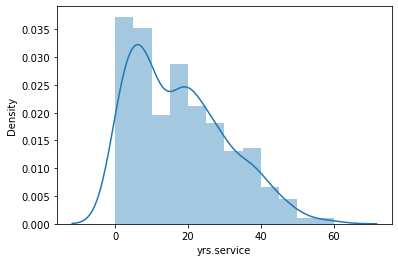

In [35]:
sns.distplot(df['yrs.service'])

The data is not normnally distributed, there are some outliers available in data

<AxesSubplot:xlabel='salary', ylabel='Density'>

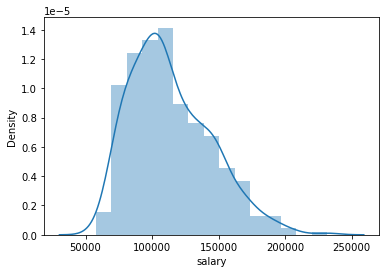

In [36]:
sns.distplot(df['salary'])

data is not normally distributed, there are some outliers available

# Ploting outliers

<AxesSubplot:>

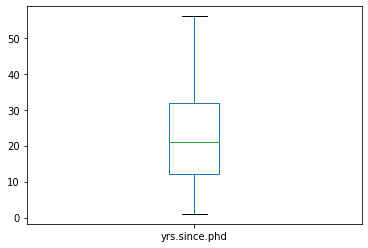

In [37]:
df['yrs.since.phd'].plot.box()

no outliers available

<AxesSubplot:>

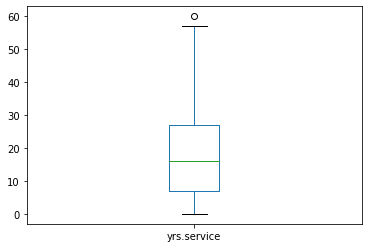

In [38]:
df['yrs.service'].plot.box()

very less outliers present

<AxesSubplot:>

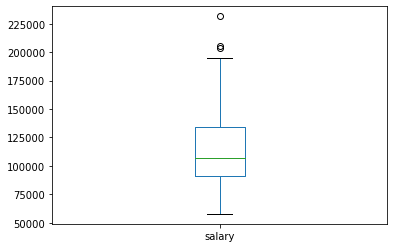

In [39]:
df['salary'].plot.box()

very less outliers are present

no outliers are present

# Normal Distribution shows that data is skewed

# Removing outliers:

In [40]:
from scipy.stats import zscore
import numpy as np

In [41]:
zscore(df)

array([[-0.25754973,  0.02966908,  0.86091884],
       [-0.17985426, -0.12429986,  1.96667226],
       [-1.42298184, -1.12509795, -1.12249537],
       ...,
       [ 1.52944617,  0.56856036, -0.39564018],
       [ 0.20862311, -0.20128433, -0.60750187],
       [-1.11219995, -1.04811348, -1.08001725]])

In [42]:
np.abs(zscore(df))

array([[0.25754973, 0.02966908, 0.86091884],
       [0.17985426, 0.12429986, 1.96667226],
       [1.42298184, 1.12509795, 1.12249537],
       ...,
       [1.52944617, 0.56856036, 0.39564018],
       [0.20862311, 0.20128433, 0.60750187],
       [1.11219995, 1.04811348, 1.08001725]])

In [43]:
np.abs(zscore(df))<0

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [44]:
z=np.abs(zscore(df))

In [45]:
z.shape

(397, 3)

In [46]:
type(z)

numpy.ndarray

In [47]:
#if np.abs is not applied 
#threshold=(-3,3)

#if applied np.abs
threshold=3
#index numbers
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([2, 1, 1, 2], dtype=int64))


In [48]:
df.iloc[127]   #at index 127, outliers identified

yrs.since.phd        2
yrs.service          0
salary           72500
Name: 127, dtype: int64

In [49]:
len(np.where(z>3)[0])

4

In [50]:
df_new=df[(z<3).all(axis=1)]

In [51]:
print("Old DataFrame",df.shape)
print("New DataFrame", df_new.shape)
print("total dropped rows", df.shape[0]-df_new.shape[0])

Old DataFrame (397, 3)
New DataFrame (393, 3)
total dropped rows 4


# Percentage data loss:

In [52]:
loss_percent=(397-354)/397*100
print(loss_percent, '%')

10.831234256926953 %


# model without outliers is df and model with desired outliers is df_new:

dividing data in feature and vectors:

In [53]:
df_new

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [54]:
#independent column
x=df_new.iloc[:,:-1]

In [55]:
#target
y=df_new.iloc[:,-1]

# Transforming data to remove skewness:

In [56]:
from sklearn.preprocessing import power_transform

In [57]:
x=power_transform(x,method='yeo-johnson')

In [58]:
x

array([[-0.11344983,  0.26888583],
       [-0.03455335,  0.1209006 ],
       [-1.6242611 , -1.28449532],
       [ 1.59976363,  1.46109915],
       [ 1.31028198,  1.55315864],
       [-1.36187943, -0.84005312],
       [ 0.68342795,  0.60337981],
       [ 1.59976363,  1.72997607],
       [ 0.04281072,  0.40814245],
       [-0.19398811,  0.26888583],
       [-0.72000082, -0.60348074],
       [-1.24247753, -1.47508922],
       [-2.12374282, -1.70716059],
       [-1.93539178, -2.02223253],
       [-0.03455335,  0.26888583],
       [-0.72000082, -1.28449532],
       [-0.11344983,  0.40814245],
       [ 1.1904517 ,  1.21866709],
       [ 1.12958897,  0.60337981],
       [ 1.25067523,  1.31789249],
       [ 0.74953316,  0.78500622],
       [ 1.06806314,  1.06349813],
       [ 0.94291868,  1.00992197],
       [ 0.26663401,  0.33951754],
       [-0.62629143, -0.60348074],
       [ 0.04281072, -0.60348074],
       [ 1.00584876,  0.60337981],
       [-1.48854554, -1.28449532],
       [-0.81672914,

# applying standard scaler

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
#sc=StandardScaler()
x_scaled=normalize(x, norm='l2',axis=1)

x_scaled

array([[-0.38874013,  0.92134744],
       [-0.27479699,  0.96150227],
       [-0.78436958, -0.62029377],
       [ 0.73838312,  0.67438147],
       [ 0.6448147 ,  0.76433893],
       [-0.85110735, -0.52499169],
       [ 0.74964456,  0.66184064],
       [ 0.6789358 ,  0.73419764],
       [ 0.10431931,  0.99454386],
       [-0.58507975,  0.81097576],
       [-0.76639638, -0.64236796],
       [-0.64422588, -0.76483528],
       [-0.77940471, -0.62652078],
       [-0.69142455, -0.72244867],
       [-0.12745756,  0.99184403],
       [-0.48895665, -0.87230808],
       [-0.26781245,  0.96347106],
       [ 0.69877728,  0.71533929],
       [ 0.88205046,  0.47115495],
       [ 0.68836673,  0.72536284],
       [ 0.69057651,  0.72325934],
       [ 0.70861951,  0.70559081],
       [ 0.68244389,  0.73093798],
       [ 0.61763567,  0.78646435],
       [-0.72009884, -0.69387151],
       [ 0.07076183, -0.99749324],
       [ 0.85754161,  0.5144146 ],
       [-0.75709133, -0.65330905],
       [-0.37448603,

# Since the salary is continuous data, we will use linear regression model

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.metrics import adjusted_rand_score

In [61]:
print(x_scaled.shape)

(393, 2)


In [62]:
x

array([[-0.11344983,  0.26888583],
       [-0.03455335,  0.1209006 ],
       [-1.6242611 , -1.28449532],
       [ 1.59976363,  1.46109915],
       [ 1.31028198,  1.55315864],
       [-1.36187943, -0.84005312],
       [ 0.68342795,  0.60337981],
       [ 1.59976363,  1.72997607],
       [ 0.04281072,  0.40814245],
       [-0.19398811,  0.26888583],
       [-0.72000082, -0.60348074],
       [-1.24247753, -1.47508922],
       [-2.12374282, -1.70716059],
       [-1.93539178, -2.02223253],
       [-0.03455335,  0.26888583],
       [-0.72000082, -1.28449532],
       [-0.11344983,  0.40814245],
       [ 1.1904517 ,  1.21866709],
       [ 1.12958897,  0.60337981],
       [ 1.25067523,  1.31789249],
       [ 0.74953316,  0.78500622],
       [ 1.06806314,  1.06349813],
       [ 0.94291868,  1.00992197],
       [ 0.26663401,  0.33951754],
       [-0.62629143, -0.60348074],
       [ 0.04281072, -0.60348074],
       [ 1.00584876,  0.60337981],
       [-1.48854554, -1.28449532],
       [-0.81672914,

In [63]:
print(y.shape)

(393,)


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=45,test_size=0.25)

In [65]:
x_train.shape

(294, 2)

In [66]:
x_test.shape

(99, 2)

In [67]:
y_train.shape

(294,)

In [68]:
y_test.shape

(99,)

# Linear Regression

Coefficients: 
 [14847.31292128  6166.06293752]
Mean squared error: 679717416.89
Coefficient of determination/R-Square: 0.15


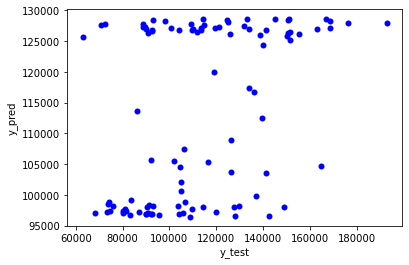

In [69]:
# Linear Regression:
lr=LinearRegression()

# training
lr.fit(x_train, y_train)

# prediction
y_pred_lr = lr.predict(x_test)

# The coefficients
print("Coefficients: \n", lr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_lr))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination/R-Square: %.2f" % r2_score(y_test, y_pred_lr))

# Plot outputs
# plt.scatter(x_test[:,1], y_test, color="black")
plt.scatter(y_test, y_pred_lr, color="blue", linewidth=3, marker=".")

plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

In [70]:
# Cross Valiodation
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(lr,x_train,y_train,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.21446149 0.00333914 0.24305313 0.11488296 0.32458984]
CV scores average:  0.18006531212590893


# Decision Tree Regression¶

Mean squared error: 905528388.20
Coefficient of determination/R-Square: -0.14


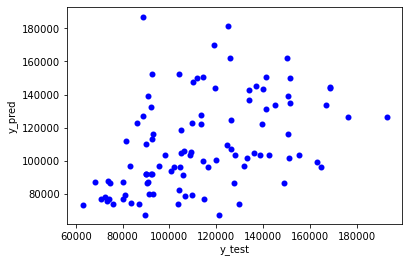

In [71]:
# Decision tree regression
dt=DecisionTreeRegressor()

# training
dt.fit(x_train, y_train)

# prediction
y_pred_dt = dt.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_dt))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination/R-Square: %.2f" % r2_score(y_test, y_pred_dt))

# Plot outputs
# plt.scatter(x_test[:,1], y_test, color="black")
plt.scatter(y_test, y_pred_dt, color="blue", linewidth=3, marker=".")

plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()


In [72]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'min_samples_leaf': np.arange(1,10),"criterion":["mse","friedman_mse","mae"]}

dt_cv = GridSearchCV(dt, grid, cv=5) # GridSearchCV
dt_cv.fit(x_train,y_train) # Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(dt_cv.best_params_)) 
print("Best score: {}".format(dt_cv.best_score_))

Tuned hyperparameter k: {'criterion': 'mse', 'min_samples_leaf': 9}
Best score: 0.1412706474732966


# Random Forest Regression

Mean squared error: 749498712.15
Coefficient of determination/R-Square: 0.06


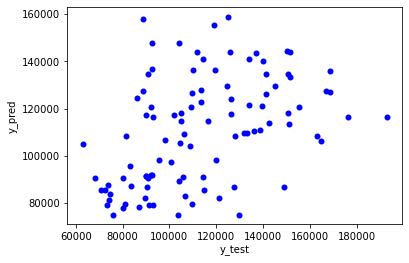

In [73]:
# Random forest regression
rf=RandomForestRegressor()

# training
rf.fit(x_train, y_train)

# prediction
y_pred_rf = rf.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_rf))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination/R-Square: %.2f" % r2_score(y_test, y_pred_rf))

# Plot outputs
# plt.scatter(x_test[:,1], y_test, color="black")
plt.scatter(y_test, y_pred_rf, color="blue", linewidth=3, marker=".")

plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

In [74]:
# grid search cross validation with 1 hyperparameter
grid = {'min_samples_leaf': np.arange(1,10),"criterion":["mse","friedman_mse","mae"]}

rf_cv = GridSearchCV(rf, grid, cv=5) # GridSearchCV
rf_cv.fit(x_train,y_train) # Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(rf_cv.best_params_)) 
print("Best score: {}".format(rf_cv.best_score_))

Tuned hyperparameter k: {'criterion': 'mse', 'min_samples_leaf': 9}
Best score: 0.2547267048701323


# Support Vector Regression¶

Mean squared error: 839355228.89
Coefficient of determination/R-Square: -0.05


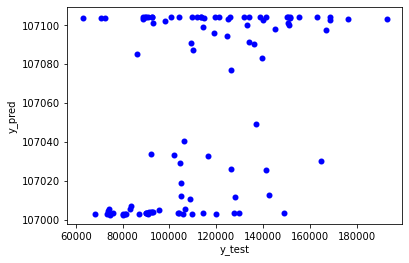

In [75]:
# SV regression
svr = SVR()

# training
svr.fit(x_train, y_train)

# prediction
y_pred_svr = svr.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_svr))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination/R-Square: %.2f" % r2_score(y_test, y_pred_svr))

# Plot outputs
# plt.scatter(x_test[:,1], y_test, color="black")
plt.scatter(y_test, y_pred_svr, color="blue", linewidth=3, marker=".")

plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

# KNN Regression

Mean squared error: 625665592.35
Coefficient of determination/R-Square: 0.22


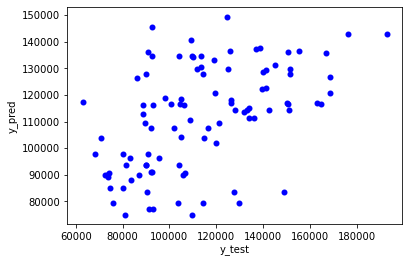

In [76]:
# KNN regression
knn = KNeighborsRegressor()

# training
knn.fit(x_train, y_train)

# prediction
y_pred_knn = knn.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_knn))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination/R-Square: %.2f" % r2_score(y_test, y_pred_knn))

# Plot outputs
# plt.scatter(x_test[:,1], y_test, color="black")
plt.scatter(y_test, y_pred_knn, color="blue", linewidth=3, marker=".")

plt.xlabel("y_test")
plt.ylabel("y_pred")

plt.show()

In [77]:
# Cross Valiodation
k = 5
knn_cv = cross_val_score(knn,x_train,y_train,cv=k) # uses R^2 as score 
print('CV Scores: ', knn_cv)
print('CV scores average: ',np.sum(knn_cv)/k)

CV Scores:  [ 0.20915613 -0.10564889  0.17974376  0.00786063  0.20098098]
CV scores average:  0.09841852188186746


# Evaluation metrics:

In [78]:
sq_errorlr=mean_squared_error(y_test,y_pred_lr)
sq_errorsvr=mean_squared_error(y_test,y_pred_svr)
sq_errordtr=mean_squared_error(y_test,y_pred_dt)
sq_errorrfr=mean_squared_error(y_test,y_pred_rf)
sq_errorknr=mean_squared_error(y_test,y_pred_knn)

rmse_lr=sqrt(sq_errorlr)                                #rmse=root mean squared error
rmse_svr=sqrt(sq_errorsvr)
rmse_dtr=sqrt(sq_errordtr)
rmse_rfr=sqrt(sq_errorrfr)
rmse_knr=sqrt(sq_errorknr)

print("RMSE of Linear Regression is: ", rmse_lr)
print("RMSE of Support Vector Regression is: ", rmse_svr)
print("RMSE of Decision Tree Regressor is: ", rmse_dtr)
print("RMSE of Random Forest Regressor is: ", rmse_rfr)
print("RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  26071.390774083127
RMSE of Support Vector Regression is:  28971.627998662138
RMSE of Decision Tree Regressor is:  30091.998740507806
RMSE of Random Forest Regressor is:  27376.974123423242
RMSE of K Neighbors Regressor is:  25013.308304875376


KNeighbors regressoion has the lowest RMSE, followed by linear regression, Random forest regression,support vector regression, and 
decision tree regressor

In [79]:
#R2 Score for the model:

print("R2 Score for Linear Regression is:",r2_score(y_test,y_pred_lr))
print("R2 Score for Support Vector Regression is:",r2_score(y_test,y_pred_svr))
print("R2 Score for Decision Tree Regressor  is:",r2_score(y_test,y_pred_dt))
print("R2 Score for Random Forest Regressor  is:",r2_score(y_test,y_pred_rf))
print("R2 Score for K Neighbors Regressor  is:",r2_score(y_test,y_pred_knn))

R2 Score for Linear Regression is: 0.14798254917497367
R2 Score for Support Vector Regression is: -0.052121491493990924
R2 Score for Decision Tree Regressor  is: -0.1350687356037159
R2 Score for Random Forest Regressor  is: 0.060512550871877235
R2 Score for K Neighbors Regressor  is: 0.21573584872636653


We use R2 score to evaluate the model and check the accuracy by which we would be able to choose our best regression model.

KNN regression has the highest R2 Score,followed by linear regression,random forest regression, support vector regression, 
and decision tree regression

# KNN regression is the best performing model

# KN regression has the highest R2 score of 21% and the lowest RMSE of 25013.308% as compared to all the other models

# Saving the model:¶

In [80]:
file="Final_salary_prediction.pkl"
pickle.dump(knn,open(file,'wb'))

In [81]:
import numpy as np
a=np.array(y_test)
predicted=np.array(knn.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,176500,142866.2
1,81500,93503.8
2,141136,122456.6
3,92550,145438.6
4,116518,107639.2
...,...,...
94,105631,89854.0
95,88600,112948.4
96,140096,128743.0
97,90450,83490.6


# Loading the model:

In [82]:
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)*100
print(result)

21.57358487263665


Finally I have loaded the saved model and passed the unseen data set to predict the model score.